<a href="https://colab.research.google.com/github/TaeGuSeo/ML-study/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 16.3 MB/s 
     |████████████████████████████████| 9.8 MB 15.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import os
from pandas import to_datetime
import seaborn as sns
import itertools
import warnings
import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import ndiffs
import pmdarima as pm

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from pmdarima.model_selection import train_test_split

In [ ]:
dates = ['2022-04-01','2022-04-08','2022-04-15','2022-04-22','2022-04-28','2022-05-06','2022-05-13','2022-05-20','2022-05-27','2022-06-03','2022-06-10','2022-06-17','2022-06-24']
visits = ['5379','4571','5614','4866','1962','2088','2131','1843','1021','1869','2094','539','1224']

df_traffic = pd.DataFrame((zip(dates,visits)),columns=['date','visits'])

print(df_traffic)

          date visits
0   2022-04-01   5379
1   2022-04-08   4571
2   2022-04-15   5614
3   2022-04-22   4866
4   2022-04-28   1962
5   2022-05-06   2088
6   2022-05-13   2131
7   2022-05-20   1843
8   2022-05-27   1021
9   2022-06-03   1869
10  2022-06-10   2094
11  2022-06-17    539
12  2022-06-24   1224


In [ ]:
X_train = df_traffic[df_traffic['date'] < '2022-06-01']
X_valid = df_traffic[df_traffic['date'] >= '2022=06-01']

In [ ]:
nyc = X_train[['date','visits']]
nyc_v = X_valid[['date','visits']]

In [ ]:
nyc.set_index('date',inplace=True)
nyc_v.set_index('date',inplace=True)

In [ ]:
index_4_weeks = pd.date_range(nyc.index[-1],freq='W', periods = 4, tz=None)

In [ ]:
from pandas.core.indexes.datetimes import DatetimeIndex
DatetimeIndex(['2022-08-30','2022-09-06','2022-09-13','2022-09-20'])

DatetimeIndex(['2022-08-30', '2022-09-06', '2022-09-13', '2022-09-20'], dtype='datetime64[ns]', freq=None)

In [ ]:
auto_arima_model = pm.auto_arima(nyc, seasonal=False, m=52)

fcast2 = auto_arima_model.predict(4)
fcast2 = pd.Series(fcast2, index=index_4_weeks)
fcast2 = fcast2.rename('Auto Arima')

In [ ]:
df_date = ['04-01','04-08','04-15','04-22','04-28','05-06','05-13','05-20','05-27','06-03','06-10','06-17','06-24']
pd_date = ['06-24','08-30','09-06','09-13','09-20']
visit=[5379,4571,5614,4866,1962,2088,2131,1843,1021,1869,2094,539,1224]
pd_visit=[1224,970,922,876,832]


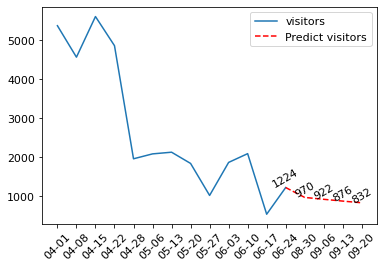

In [ ]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 11
matplotlib.rcParams['axes.unicode_minus'] = False

plt.plot(df_date,visit,label='visitors')
plt.plot(pd_date,pd_visit,ls='--',color='red',label='Predict visitors')
for idx, txt in enumerate(pd_visit):
  plt.text(pd_date[idx],pd_visit[idx]+0.3,txt,rotation=30,color='black', ha = 'center')
plt.legend()
plt.xticks(rotation=45)

plt.show()